In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-reviews-alexa/amazon_alexa.tsv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
from sklearn.model_selection import train_test_split

In [3]:
# Load dataset
data_path = "/kaggle/input/amazon-reviews-alexa/amazon_alexa.tsv"
df = pd.read_csv(data_path, sep='\t')


In [4]:
# Display basic info and first few rows
print(df.head())
print(df.info())

   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3  I have had a lot of fun with this thing. My 4 ...         1  
4                                              Music         1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews

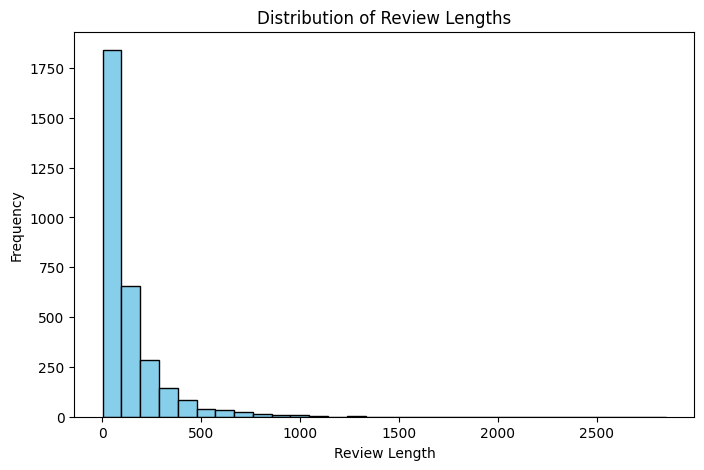

In [5]:
# Data Visualization
plt.figure(figsize=(8, 5))
df['length'] = df['verified_reviews'].apply(lambda x: len(str(x)))
plt.hist(df['length'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths')
plt.show()

In [6]:
# Assign unique IDs
df['Review_ID'] = ['AA' + str(i+1) for i in range(len(df))]

In [7]:
# Splitting into training & validation sets
train_data, val_data = train_test_split(df, test_size=0.2, random_state=42)

In [8]:
# Sentiment Analysis Function
def get_sentiment(text):
    blob = TextBlob(str(text))
    polarity = blob.sentiment.polarity
    sentiment = "Neutral"
    if polarity > 0.1:
        sentiment = "Positive"
    elif polarity < -0.1:
        sentiment = "Negative"
    return sentiment, polarity

In [9]:
# Applying sentiment analysis
df['Sentiment'], df['Polarity_Score'] = zip(*df['verified_reviews'].apply(get_sentiment))


In [10]:
# Function to retrieve sentiment based on Unique ID
def get_review_analysis(review_id):
    result = df[df['Review_ID'] == review_id]
    if not result.empty:
        return {
            'Sentiment': result.iloc[0]['Sentiment'],
            'Polarity Score': result.iloc[0]['Polarity_Score'],
            'Full Review': result.iloc[0]['verified_reviews']
        }
    else:
        return "Review ID not found."

In [11]:
# Example usage
example_id = "AA34"  # Replace with any existing ID
print(get_review_analysis(example_id))


{'Sentiment': 'Positive', 'Polarity Score': 0.2425925925925926, 'Full Review': "The speakers sound pretty good for being so small and setup is pretty easy.  I bought two and the reason I only rate it a 3 is I have followed the instructions for synching music to both units.  I know I've done it correctly but they won't sync.  That was my primary motivation for purchasing multiple units."}
